In [401]:
import pandas as pd

In [402]:
import warnings
warnings.filterwarnings("ignore")

In [403]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

from src.data_preparation_workflow import load_dataset, get_features_and_target, create_train_test_split


In [404]:
# Test the flow
path = "../data/cleaned_data/final_dataset.csv"

df = load_dataset(path)
print(f"Loaded data: {df.shape}")

X, y = get_features_and_target(df)
print(f"Features: {X.shape}, Target: {y.shape}")

X_train, X_test, y_train, y_test = create_train_test_split(X, y, stratify_by="Role")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Loaded data: (366, 12)
Features: (366, 11), Target: (366,)
Train: (292, 11), Test: (74, 11)


In [405]:
X_train

,Gender,Education Level,Seniority,Area,Role,Age,Years of Experience,noun_count,verb_count,adj_count,adv_count
103,Male,Bachelor's,Junior,Software/data,Engineer,33.0,5.0,22,18,7,3
273,Female,Bachelor's,Senior,Management,Support,41.0,11.0,26,16,8,2
50,Female,Bachelor's,Senior,People & Support,Management,51.0,22.0,27,14,7,2
225,Male,Bachelor's,Senior,Management,Management,43.0,15.0,32,14,14,0
266,Male,Bachelor's,Junior,Other,Analysis,30.0,2.0,21,9,3,0
...,...,...,...,...,...,...,...,...,...,...,...
146,Female,Bachelor's,Senior,Finance & Operations,Individual Contributor,38.0,10.0,27,14,14,1
337,Female,Bachelor's,Senior,Sales & Marketing,Analysis,35.0,8.0,37,14,10,1
339,Female,Bachelor's,Junior,Finance & Operations,Management,28.0,1.0,24,14,9,4
194,Female,Bachelor's,Junior,People & Support,Management,32.0,5.0,30,18,10,1


In [406]:
# Get unique roles from X_train
unique_roles = X_train['Role'].unique()
print("Unique roles in training data:")
for role in sorted(unique_roles):
    count = (X_test['Role'] == role).sum()
    print(f"- {role}: {count}")
print(f"\nTotal number of unique roles: {len(unique_roles)}")

Unique roles in training data:
- Analysis: 16
- Creative: 4
- Engineer: 5
- Individual Contributor: 8
- Leadership: 9
- Management: 18
- Other: 3
- Support: 10
- TopExecs: 1

Total number of unique roles: 9


In [407]:
# Get unique seniority values and their counts
unique_seniority = X_train['Seniority'].unique()
print("Unique seniority levels in test data:")
for seniority in sorted(unique_seniority):
    count = (X_test['Seniority'] == seniority).sum()
    print(f"- {seniority}: {count}")
print(f"\nTotal number of unique seniority levels: {len(unique_seniority)}")

Unique seniority levels in test data:
- C-level: 10
- Junior: 25
- Principal: 1
- Senior: 38

Total number of unique seniority levels: 4


In [408]:
# Get the maximum value in y_train
y_train_max = y_train.max()
print(f"Maximum salary in training data: ${y_train_max:,.2f}")

Maximum salary in training data: $250,000.00


---

# Dummy model

In [409]:
from src import dummy_model

In [410]:
# Create and train dummy model
dummy = dummy_model(strategy='median')
dummy.fit(X_train, y_train)

In [411]:
metrics = dummy.evaluate(X_test, y_test)
metrics

Model metrics updated with 3 metrics


,metric,point_estimate,95%_CI
0,RMSE,51244.643754,"(45511.720, 56385.288)"
1,MAE,44527.027027,"(38470.339, 50485.169)"
2,R2,-0.007866,"(-0.120, -0.000)"


In [412]:
# Model info
info = dummy.get_model_info()
print(f"Model info: {info}")

Model info: {'model_type': 'dummy_model', 'is_fitted': True, 'model_params': {'strategy': 'median'}}


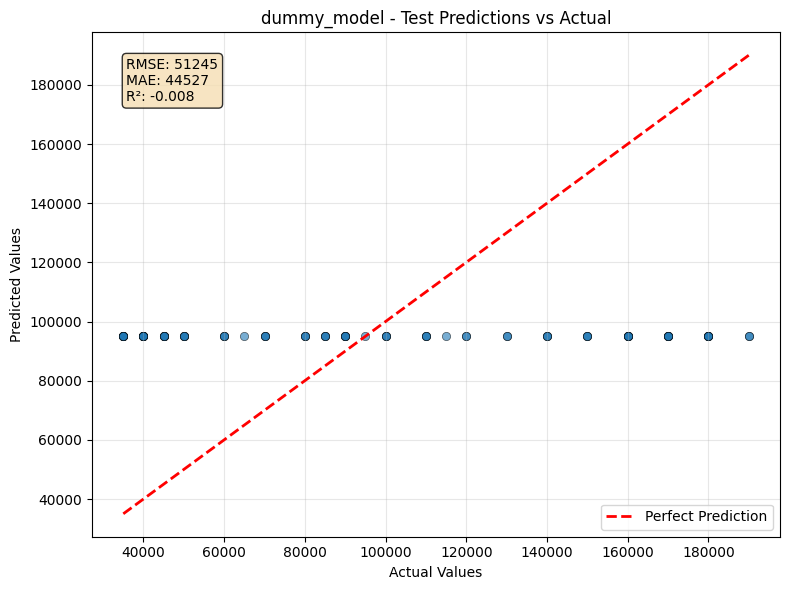

In [413]:
# Evaluate and plot
#print("Dummy Model Metrics:", dummy.evaluate(X_test, y_test))
dummy.plot_predictions(X_test, y_test, 'Test')


---

# Linear Regression

- Approaches. 
  - Ordinary Least Squares (OLS)
  - Gradient Descent
- Assumptions.
    - Linearity
    - Independence
    - Homoscedasticity
    - Normality of errors
- Evaluation metrics.
    - R-squared
    - Adjusted R-squared
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Mean Absolute Error (MAE)
- Regularization.
    - Lasso Regression (L1 regularization)
    - Ridge Regression (L2 regularization)



In [414]:
from src.models import LinearModel

### Basic OLS

In [415]:
# Basic OLS without feature selection
ols_basic = LinearModel(algorithm='ols')
ols_basic.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
After k-best selection: 27 features
Removed feature_0 (VIF: 134.65)
Removed feature_11 (VIF: 24.51)
Removed feature_2 (VIF: 16.14)
Removed feature_1 (VIF: 15.06)
Removed feature_3 (VIF: 12.33)
Removed feature_4 (VIF: 7.47)
After VIF check: 21 features


In [416]:
ols_basic.list_methods()

Available public methods:
  1. evaluate()
  2. explain_prediction()
  3. fit()
  4. get_api_info()
  5. get_feature_importance()
  6. get_feature_names()
  7. get_model_info()
  8. get_model_metrics()
  9. list_methods()
  10. load()
  11. plot_predictions()
  12. predict()
  13. predict_api_input()
  14. save()
  15. set_feature_names()
  16. set_model_metrics()


In [417]:
# Evaluate
metrics_ols = ols_basic.evaluate(X_test, y_test)
metrics_ols


Model metrics updated with 3 metrics


,metric,point_estimate,95%_CI
0,RMSE,21813.621476,"(18103.883, 24688.340)"
1,MAE,16809.688130,"(13903.429, 20334.026)"
2,R2,0.817375,"(0.736, 0.874)"


In [418]:
# Model info
info = ols_basic.get_model_info()
print(f"Features: {info['n_features_after_encoding']} → {info['n_features_final']}")

Features: 27 → 21


In [419]:
feature_imp = ols_basic.get_feature_importance()
feature_imp


,feature,coefficient,abs_coefficient
20,cat__Role_TopExecs,119356.582793,119356.582793
16,cat__Role_Leadership,62374.754679,62374.754679
3,cat__Education Level_PhD,51206.784534,51206.784534
4,cat__Seniority_Junior,-46604.851169,46604.851169
5,cat__Seniority_Principal,-26720.191047,26720.191047
18,cat__Role_Other,24045.838458,24045.838458
2,cat__Education Level_Master's,13946.162541,13946.162541
17,cat__Role_Management,10117.752879,10117.752879
15,cat__Role_Individual Contributor,-8648.616580,8648.616580
14,cat__Role_Engineer,-8024.291617,8024.291617


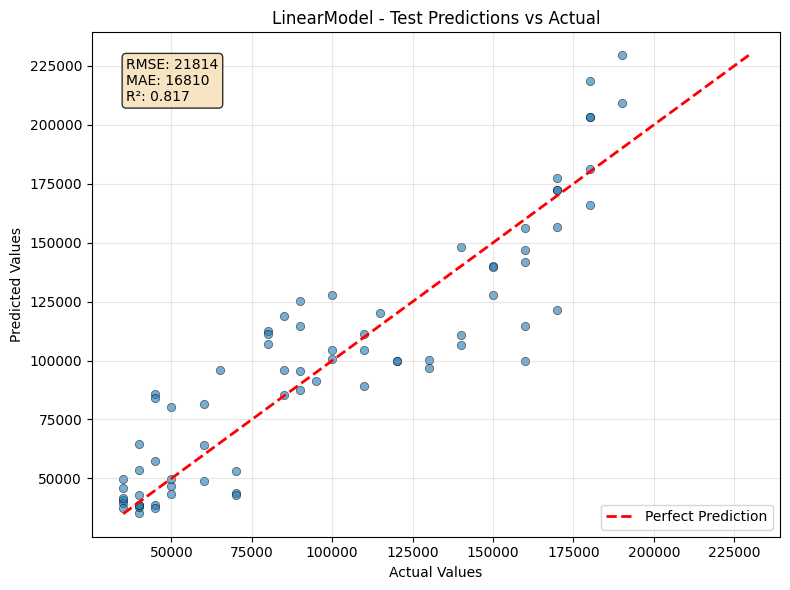

In [420]:
ols_basic.plot_predictions(X_test, y_test, 'Test')

Linear Model SHAP Test:
Prediction: $95,513.41
Base value: $98,562.29
SHAP values shape: 21



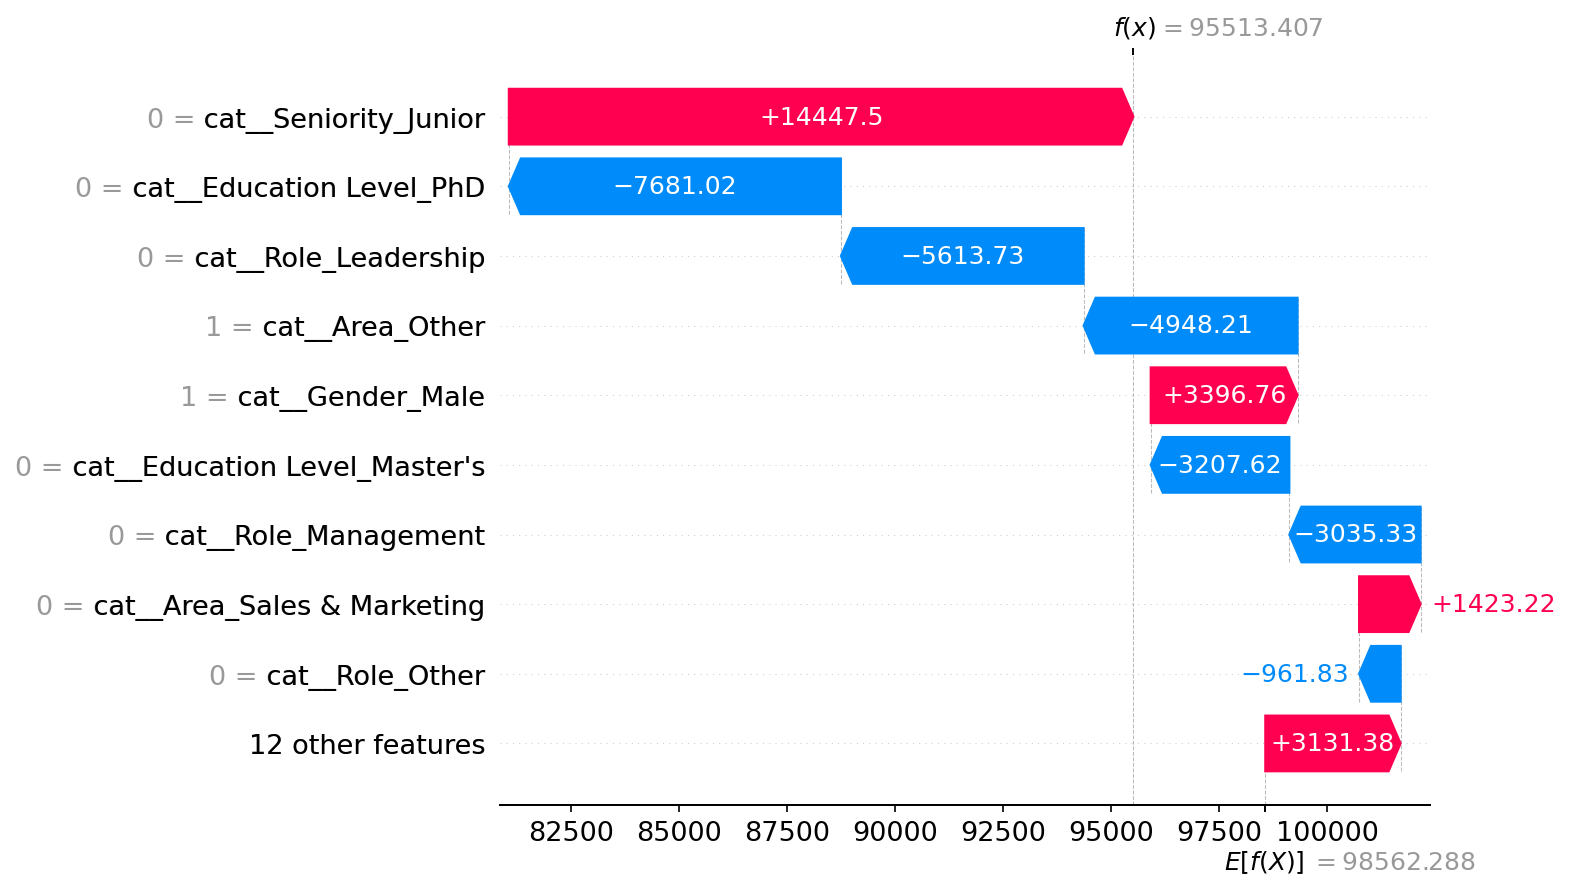

In [421]:
# Test explain_prediction
test_input = X_test.iloc[:1]  # Single row for testing
explanation = ols_basic.explain_prediction(test_input)

print("Linear Model SHAP Test:")
print(f"Prediction: ${explanation['prediction']:,.2f}")
print(f"Base value: ${explanation['base_value']:,.2f}")
print(f"SHAP values shape: {len(explanation['shap_values'])}")

# Display the plot
from IPython.display import HTML
HTML(f'<img src="{explanation["shap_plot"]}" width="600">')

In [422]:
ols_basic.save("OLS_basic")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/OLS_basic.pkl


---

### SGD Regression


In [423]:
sgd_reg = LinearModel(algorithm='sgd')
sgd_reg.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
After k-best selection: 27 features
Removed feature_0 (VIF: 134.65)
Removed feature_11 (VIF: 24.51)
Removed feature_2 (VIF: 16.14)
Removed feature_1 (VIF: 15.06)
Removed feature_3 (VIF: 12.33)
Removed feature_4 (VIF: 7.47)
After VIF check: 21 features


In [424]:
# Evaluate
metrics_sgd = sgd_reg.evaluate(X_test, y_test)
metrics_sgd


Model metrics updated with 3 metrics


,metric,point_estimate,95%_CI
0,RMSE,21004.581812,"(17266.213, 24349.439)"
1,MAE,16224.883819,"(13384.329, 19814.767)"
2,R2,0.830670,"(0.753, 0.885)"


In [425]:
feature_imp_sgd = sgd_reg.get_feature_importance()
feature_imp_sgd

,feature,coefficient,abs_coefficient
20,cat__Role_TopExecs,79162.948337,79162.948337
16,cat__Role_Leadership,59040.714107,59040.714107
3,cat__Education Level_PhD,50906.786839,50906.786839
4,cat__Seniority_Junior,-47293.039569,47293.039569
18,cat__Role_Other,21661.852745,21661.852745
2,cat__Education Level_Master's,14316.533197,14316.533197
5,cat__Seniority_Principal,-11849.274554,11849.274554
14,cat__Role_Engineer,-9911.286147,9911.286147
15,cat__Role_Individual Contributor,-9671.320503,9671.320503
17,cat__Role_Management,7917.426204,7917.426204


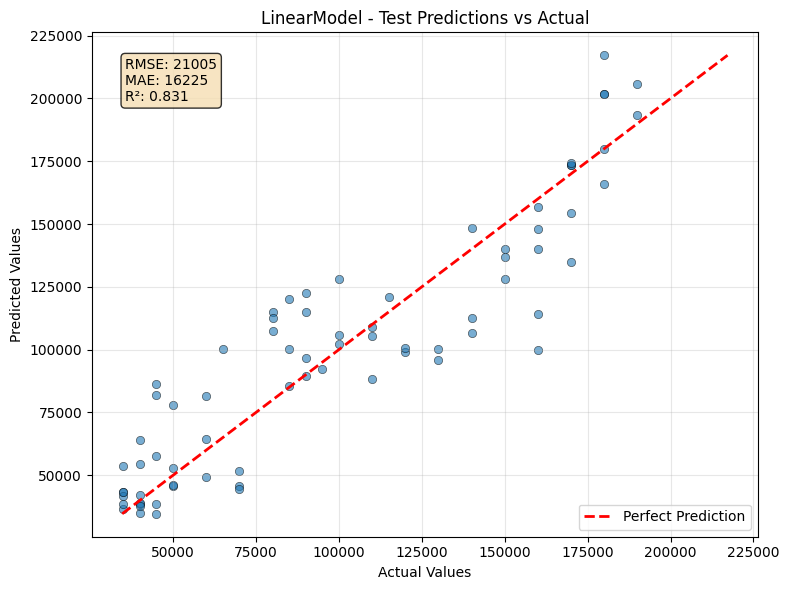

In [426]:
sgd_reg.plot_predictions(X_test, y_test, 'Test')

In [427]:
sgd_reg.save("SGD_Regression")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/SGD_Regression.pkl


---

### Lasso Regression

In [428]:
lasso_reg = LinearModel(algorithm='lasso', alpha = 100, k_best=15)
lasso_reg.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
Selected 15 best features from 27 features
After k-best selection: 15 features
Removed feature_0 (VIF: 130.44)
Removed feature_7 (VIF: 14.69)
Removed feature_1 (VIF: 10.91)
Removed feature_2 (VIF: 7.10)
After VIF check: 11 features


In [429]:
metrics_lasso = lasso_reg.evaluate(X_test, y_test)
metrics_lasso


Model metrics updated with 3 metrics


,metric,point_estimate,95%_CI
0,RMSE,20593.181310,"(16707.841, 23871.431)"
1,MAE,15887.874801,"(12947.960, 18951.118)"
2,R2,0.837238,"(0.772, 0.888)"


In [430]:
# Model info
info = lasso_reg.get_model_info()
print(f"Features: {info['n_features_after_encoding']} → {info['n_features_final']}")

Features: 27 → 11


In [431]:
feature_imp_lasso = lasso_reg.get_feature_importance()
feature_imp_lasso

,feature,coefficient,abs_coefficient
10,cat__Role_TopExecs,102621.968201,102621.968201
7,cat__Role_Leadership,55161.900987,55161.900987
3,cat__Seniority_Junior,-49175.151544,49175.151544
2,cat__Education Level_PhD,47874.549247,47874.549247
8,cat__Role_Other,15779.864861,15779.864861
1,cat__Education Level_Master's,12994.189481,12994.189481
6,cat__Role_Individual Contributor,-12564.355338,12564.355338
9,cat__Role_Support,-10954.915297,10954.915297
0,num__adj_count,-8376.074302,8376.074302
4,cat__Area_Other,-4161.297887,4161.297887


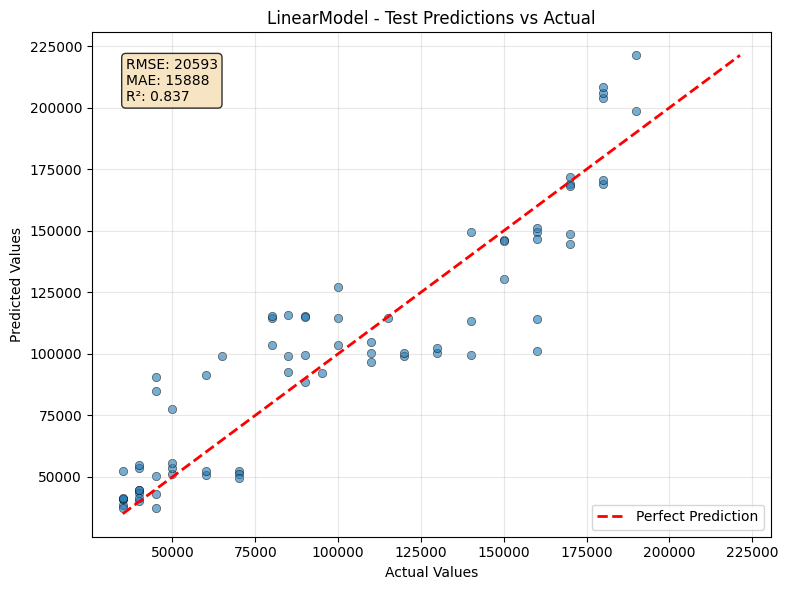

In [432]:
lasso_reg.plot_predictions(X_test, y_test, 'Test')

In [433]:
lasso_reg.get_model_info()

{'model_type': 'LinearModel',
 'is_fitted': True,
 'model_params': {'alpha': 100,
  'algorithm': 'lasso',
  'vif_threshold': 5.0,
  'k_best': 15},
 'n_features_after_encoding': 27,
 'n_features_after_kbest': 15,
 'n_features_final': 11,
 'n_numerical_features_scaled': 6,
 'n_onehot_features_not_scaled': 21,
 'features_removed_by_kbest': 12,
 'features_removed_by_vif': 4}

In [434]:
lasso_reg.save("Lasso_Regression")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/Lasso_Regression.pkl


---

# Decision Tree with Cross-Validation

Testing the new cross-validation functionality in DecisionTree model.

In [435]:
from src.models import DecisionTree

### Regular Training

In [436]:
# Create decision tree with ordinal mappings
ordinal_mappings = {
    'Education Level': ["Bachelor's", "Master's", 'PhD'],
    'Seniority': ['Junior', 'Senior', 'Principal','Director', 'C-level']
}

dt_regular = DecisionTree(normalize=True, ordinal_mappings=ordinal_mappings, max_depth=10)


In [437]:
dt_regular.list_methods()

Available public methods:
  1. cross_validate()
  2. evaluate()
  3. explain_prediction()
  4. fit()
  5. get_api_info()
  6. get_feature_importance()
  7. get_feature_names()
  8. get_model_info()
  9. get_model_metrics()
  10. list_methods()
  11. load()
  12. optimize()
  13. plot_predictions()
  14. predict()
  15. predict_api_input()
  16. save()
  17. set_feature_names()
  18. set_model_metrics()


In [438]:
dt_regular.fit(X_train, y_train)

After preprocessing: 24 features
  - Ordinal encoded: ['Education Level', 'Seniority']
  - One-hot encoded: ['Gender', 'Area', 'Role']
  - Numerical features: 6
  - Features normalized


In [439]:
# Evaluate on test set
metrics_dt = dt_regular.evaluate(X_test, y_test)
metrics_dt

Model metrics updated with 3 metrics


,metric,point_estimate,95%_CI
0,RMSE,18198.171447,"(13383.899, 22800.227)"
1,MAE,12163.368726,"(8666.198, 15589.296)"
2,R2,0.872895,"(0.792, 0.939)"


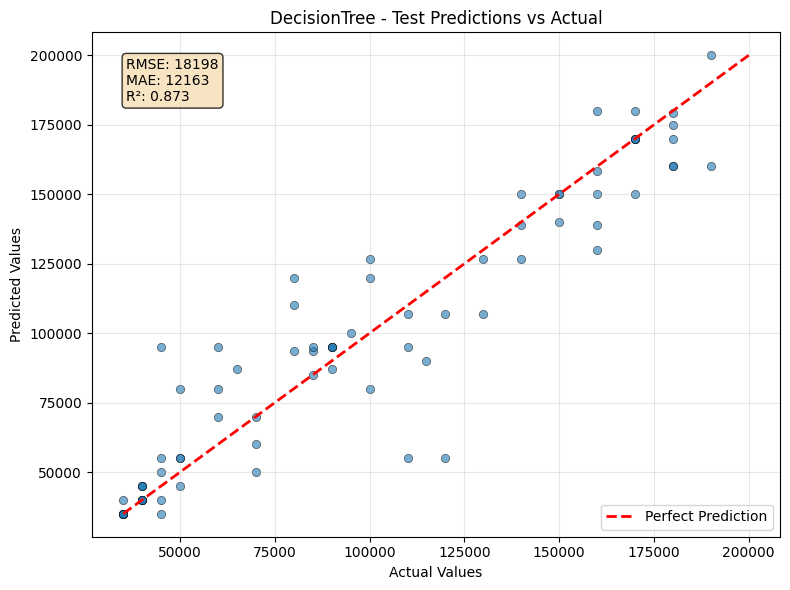

In [440]:
dt_regular.plot_predictions(X_test, y_test, 'Test')

### Cross-Validation

In [441]:
# Same model but using cross-validation with RMSE
cv_results = dt_regular.cross_validate(X_train, y_train, cv=5)

Cross-Validation Results (5-fold):
  RMSE: 18957.22 (±1616.22)
  Individual fold scores: ['21738.14', '17635.18', '18934.75', '17110.42', '19367.60']


In [442]:
# Compare with R² scoring
cv_results_r2 = dt_regular.cross_validate(X_train, y_train, cv=5, scoring='r2')
print(f"\nCV Results Summary:")
print(f"RMSE: {cv_results['mean_score']:.0f} (±{cv_results['std_score']:.0f})")
print(f"R²: {cv_results_r2['mean_score']:.3f} (±{cv_results_r2['std_score']:.3f})")

Cross-Validation Results (5-fold):
  R²: 0.83 (±0.05)
  Individual fold scores: ['0.78', '0.88', '0.76', '0.88', '0.85']

CV Results Summary:
RMSE: 18957 (±1616)
R²: 0.829 (±0.050)


### Grid Search

In [443]:
dt_regular.optimize(X_train, y_train)

Starting gridsearch for hyperparameter tuning...

Best score: 15501.02
Best params: {'regressor__ccp_alpha': 0.0, 'regressor__max_depth': 5, 'regressor__max_features': None, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 30}
Updated parameters: {'ccp_alpha': 0.0, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 30}
Model parameters updated with best found parameters.
You can now use fit() or cross_validate() with the optimized parameters.


,estimator,Pipeline(step...m_state=37))])
,param_grid,"{'regressor__ccp_alpha': [0.0, 0.01, ...], 'regressor__max_depth': [3, 5, ...], 'regressor__max_features': ['sqrt', 'log2', ...], 'regressor__min_samples_leaf': [1, 2, ...], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('ord_Education Level', ...), ('ord_Seniority', ...), ...]"


In [444]:
dt_regular.fit(X_train, y_train)

After preprocessing: 24 features
  - Ordinal encoded: ['Education Level', 'Seniority']
  - One-hot encoded: ['Gender', 'Area', 'Role']
  - Numerical features: 6
  - Features normalized


In [445]:
dt_regular.evaluate(X_test, y_test)

Model metrics updated with 3 metrics


,metric,point_estimate,95%_CI
0,RMSE,16104.114982,"(12358.664, 19554.111)"
1,MAE,10865.189098,"(7988.665, 13871.534)"
2,R2,0.900464,"(0.833, 0.943)"


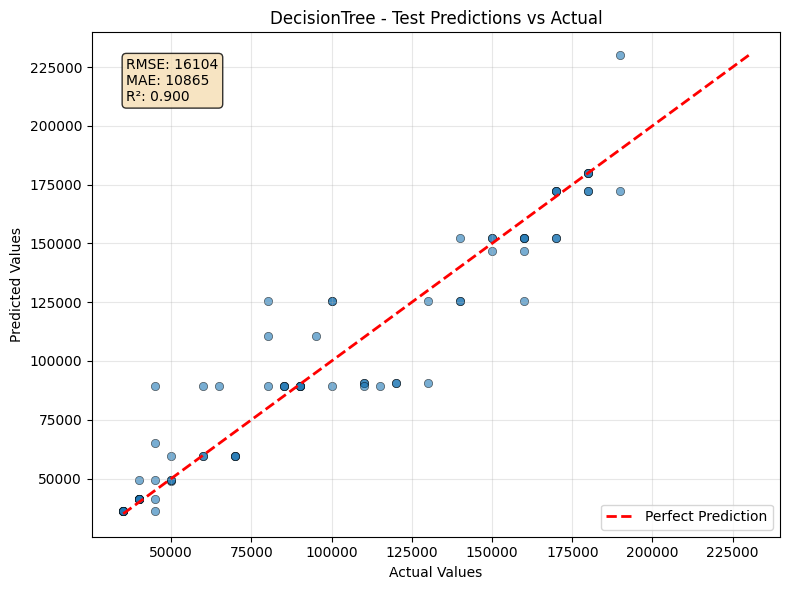

In [446]:
dt_regular.plot_predictions(X_test, y_test, 'Test')

In [447]:
dt_regular.get_feature_importance()

,feature,importance
2,num__Age,0.704012
1,ord_Seniority__Seniority,0.223338
3,num__Years of Experience,0.024162
0,ord_Education Level__Education Level,0.019630
19,cat__Role_Leadership,0.017370
8,cat__Gender_Male,0.006926
6,num__adj_count,0.002587
12,cat__Area_People & Support,0.001975
7,num__adv_count,0.000000
5,num__verb_count,0.000000


In [448]:
dt_regular.get_model_metrics()

,metric,point_estimate,95%_CI
0,RMSE,16104.114982,"(12358.664, 19554.111)"
1,MAE,10865.189098,"(7988.665, 13871.534)"
2,R2,0.900464,"(0.833, 0.943)"


Decision Tree SHAP Test:
Prediction: $89,342.11
Base value: $101,438.36
SHAP values shape: 24
Feature names available: True



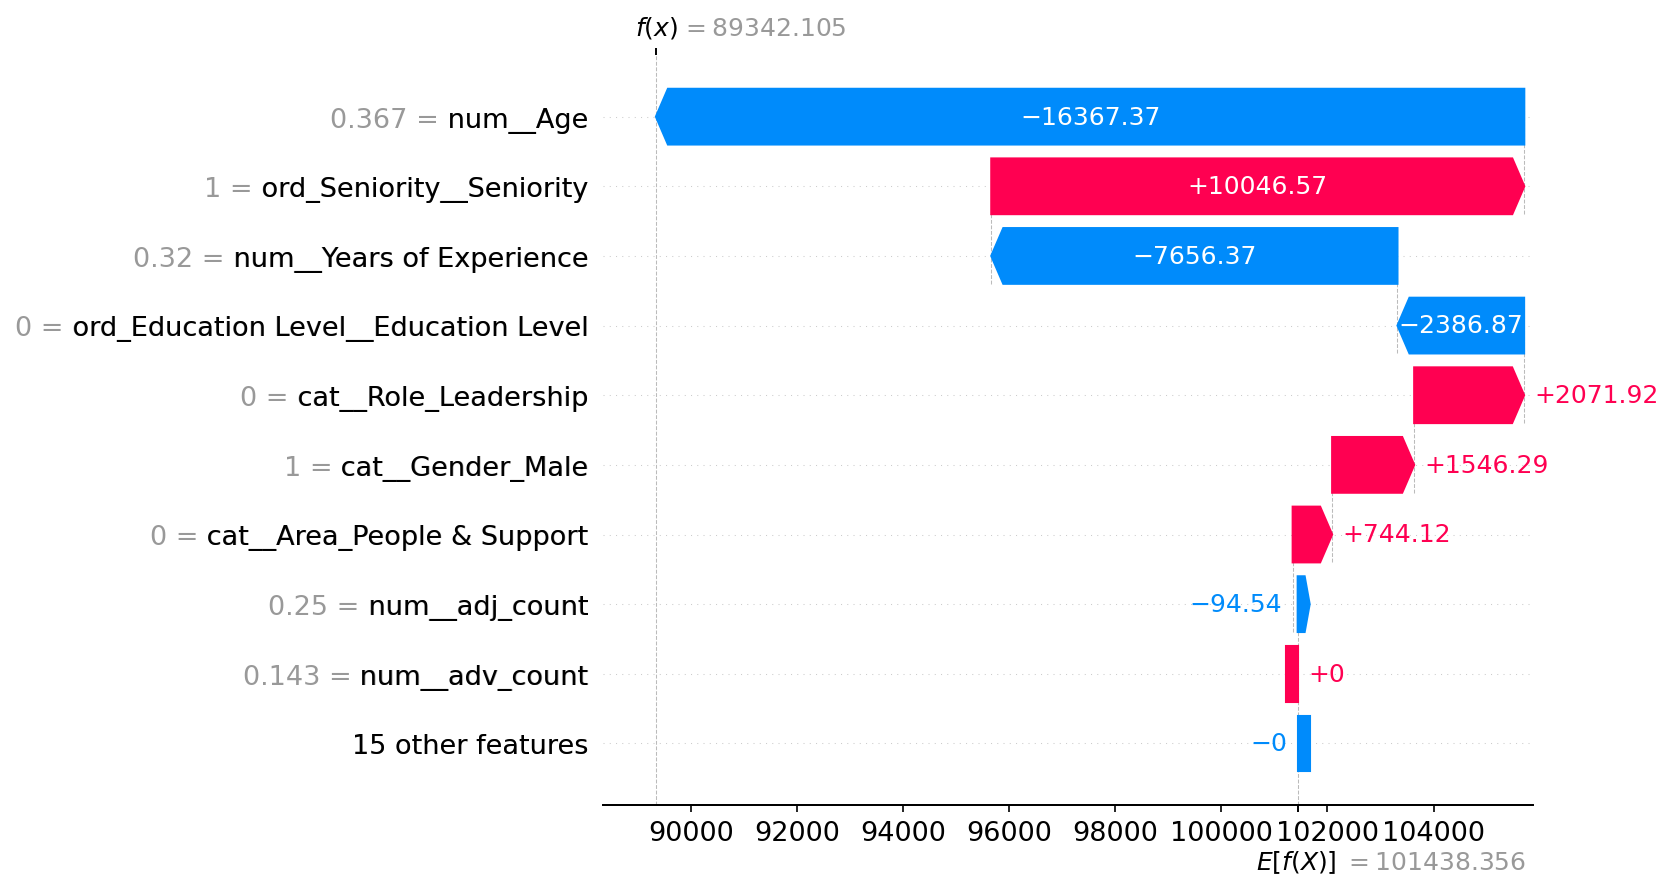

In [449]:
# Test SHAP explanation for Decision Tree
test_input_dt = X_test.iloc[:1]  # Single row for testing
explanation_dt = dt_regular.explain_prediction(test_input_dt)

print("Decision Tree SHAP Test:")
print(f"Prediction: ${explanation_dt['prediction']:,.2f}")
print(f"Base value: ${explanation_dt['base_value']:,.2f}")
print(f"SHAP values shape: {len(explanation_dt['shap_values'])}")
print(f"Feature names available: {explanation_dt['feature_names'] is not None}")

# Display the plot
from IPython.display import HTML
HTML(f'<img src="{explanation_dt["shap_plot"]}" width="600">')

In [450]:
dt_regular.save("DecisionTree_GSopt")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/DecisionTree_GSopt.pkl


---

# Random Forest

In [451]:
from src.models import RandomForest

In [452]:
rf = RandomForest(normalize=True, ordinal_mappings=ordinal_mappings, max_features="sqrt")

In [453]:
rf.get_model_info()

{'model_type': 'RandomForest',
 'is_fitted': False,
 'model_params': {'max_features': 'sqrt',
  'normalize': True,
  'ordinal_mappings': {},
  'random_state': 37,
  'max_depth': None,
  'min_samples_split': 2,
  'min_samples_leaf': 1}}

In [454]:
rf.fit(X_train, y_train)

After preprocessing: 27 features
  - Ordinal encoded: []
  - One-hot encoded: ['Gender', 'Education Level', 'Seniority', 'Area', 'Role']
  - Numerical features: 6


In [455]:
rf.list_methods()

Available public methods:
  1. cross_validate()
  2. evaluate()
  3. explain_prediction()
  4. fit()
  5. get_api_info()
  6. get_feature_importance()
  7. get_feature_names()
  8. get_model_info()
  9. get_model_metrics()
  10. list_methods()
  11. load()
  12. optimize()
  13. plot_predictions()
  14. predict()
  15. predict_api_input()
  16. save()
  17. set_feature_names()
  18. set_model_metrics()


In [456]:
rf.evaluate(X_test, y_test)

Model metrics updated with 3 metrics


,metric,point_estimate,95%_CI
0,RMSE,14338.779868,"(10870.104, 18025.238)"
1,MAE,9767.567568,"(7141.208, 12610.000)"
2,R2,0.921090,"(0.867, 0.958)"


In [457]:
rf.cross_validate(X_train, y_train, cv=5)

Cross-Validation Results (5-fold):
  RMSE: 14172.84 (±1468.37)
  Individual fold scores: ['13650.05', '15416.85', '11842.60', '13920.19', '16034.51']


{'cv_scores': array([13650.04656353, 15416.84947975, 11842.6028127 , 13920.19278751,
        16034.5054922 ]),
 'mean_score': np.float64(14172.839427136376),
 'std_score': np.float64(1468.3669112888401),
 'score_name': 'RMSE',
 'cv_folds': 5}

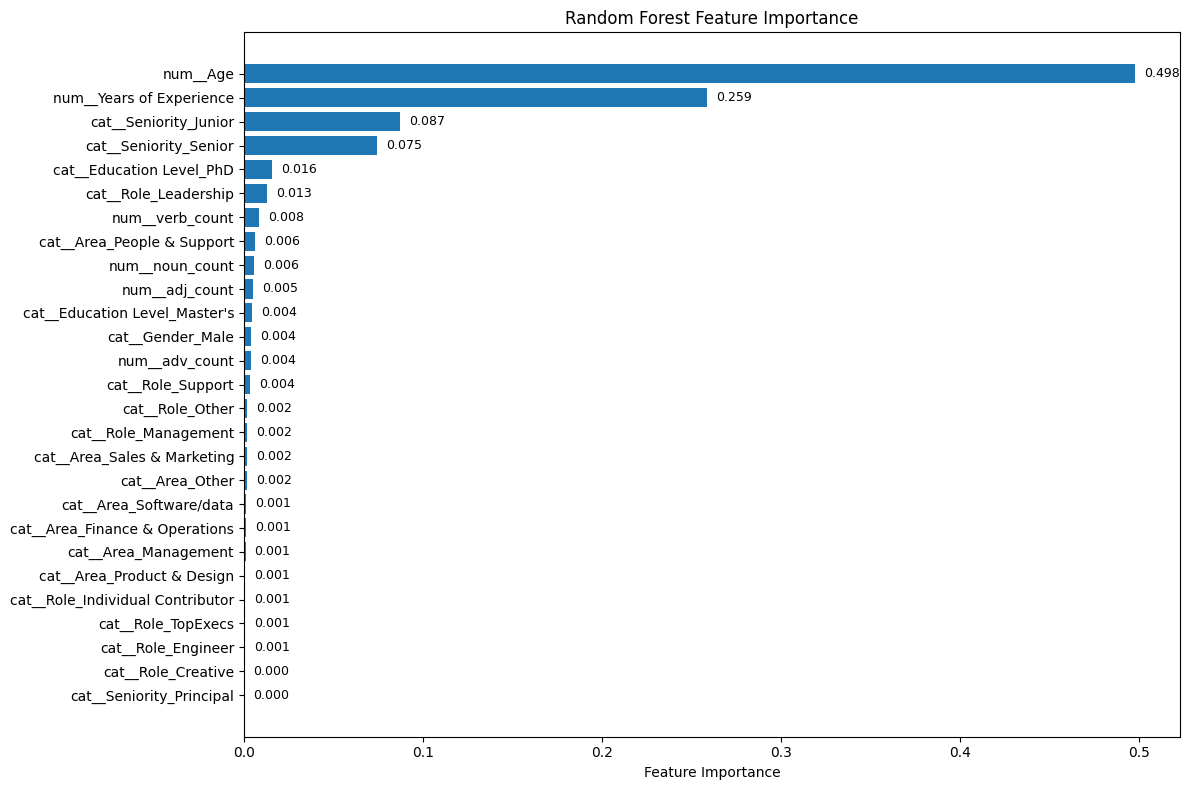

In [458]:
import matplotlib.pyplot as plt

# Get feature importance and create bar plot
feature_imp_rf = rf.get_feature_importance()

plt.figure(figsize=(12, 8))
plt.barh(feature_imp_rf['feature'], feature_imp_rf['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # To show most important features at the top
plt.tight_layout()
# Add value labels to the bars
for i, v in enumerate(feature_imp_rf['importance']):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)

plt.show()

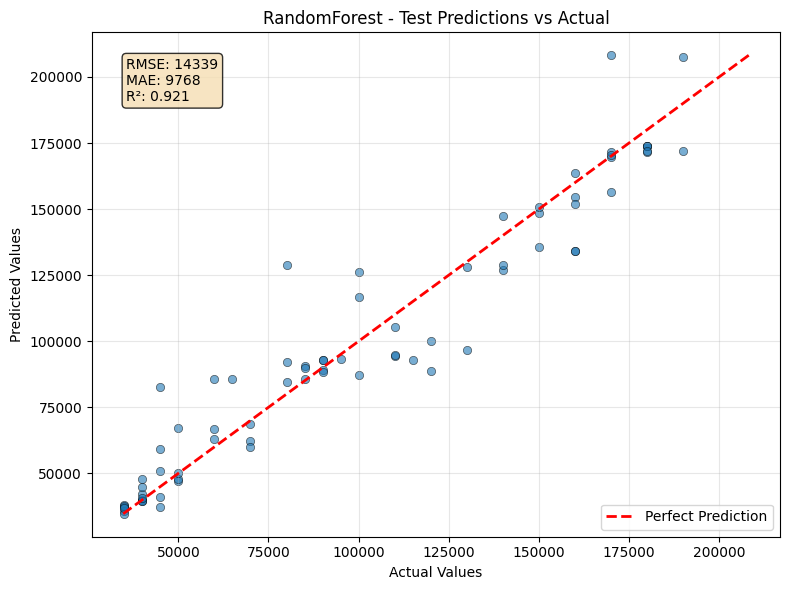

In [459]:
rf.plot_predictions(X_test, y_test, 'Test')

Random Forest SHAP Test:
Prediction: $89,050.00
Base value: $101,692.81
SHAP values shape: 27
Feature names available: True



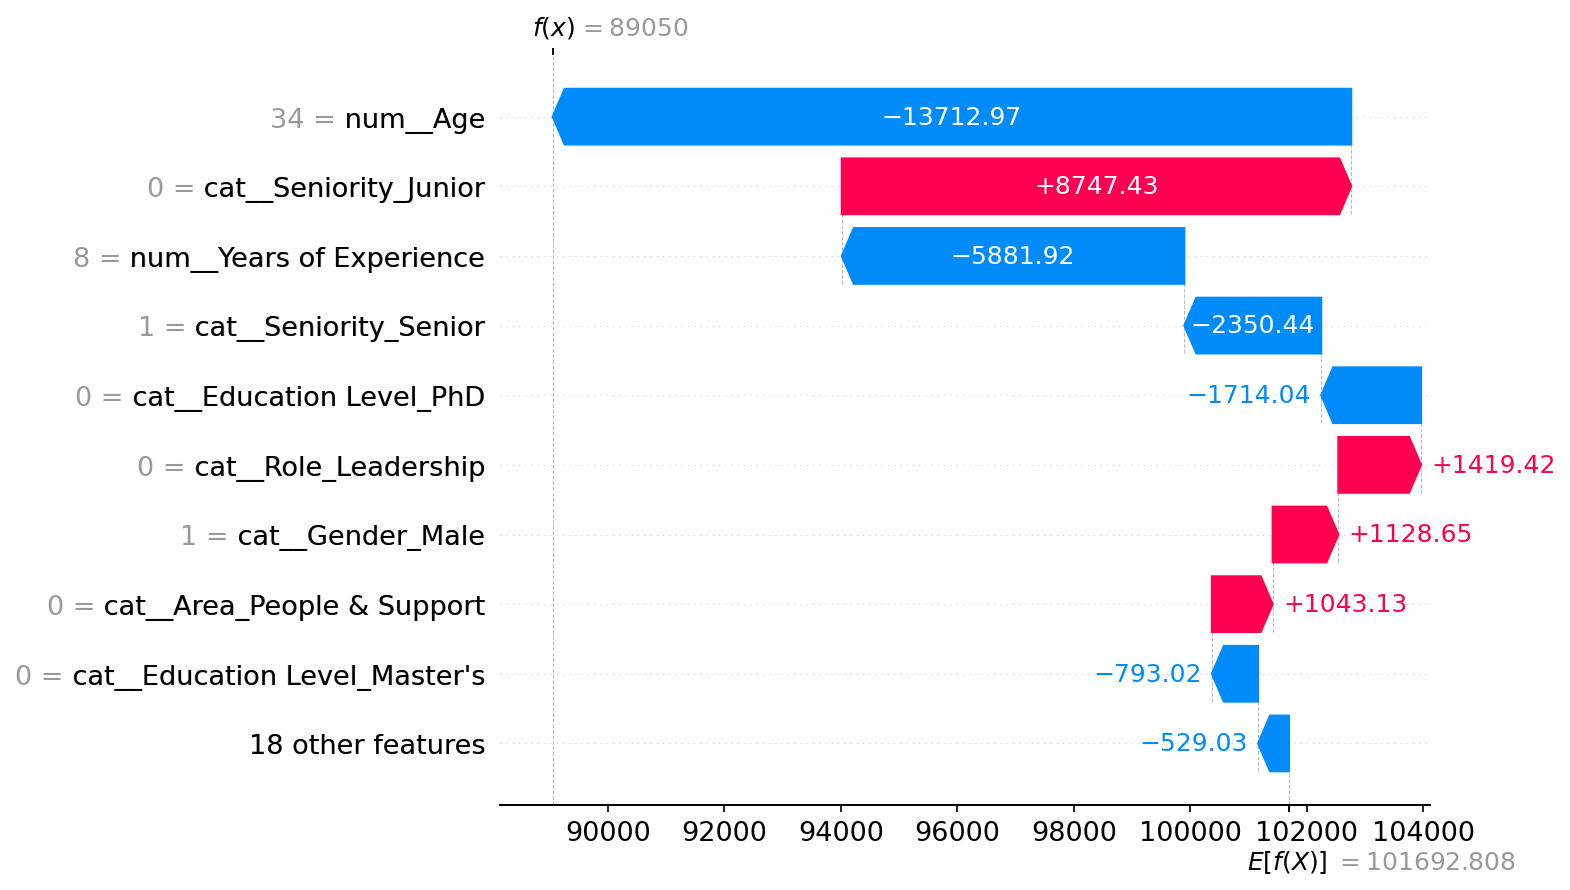

In [460]:
# Test SHAP explanation for Random Forest
test_input_rf = X_test.iloc[:1]  # Single row for testing
explanation_rf = rf.explain_prediction(test_input_rf)

print("Random Forest SHAP Test:")
print(f"Prediction: ${explanation_rf['prediction']:,.2f}")
print(f"Base value: ${explanation_rf['base_value']:,.2f}")
print(f"SHAP values shape: {len(explanation_rf['shap_values'])}")
print(f"Feature names available: {explanation_rf['feature_names'] is not None}")

# Display the plot
HTML(f'<img src="{explanation_rf["shap_plot"]}" width="600">')

---

## Random forest drop Age

In [461]:
X_train_na = X_train.drop(columns=["Age","Years of Experience"], axis=1)

In [462]:
df_na = RandomForest(normalize=True, ordinal_mappings=ordinal_mappings, max_features="sqrt")

In [463]:
df_na.fit(X_train_na, y_train)

After preprocessing: 25 features
  - Ordinal encoded: []
  - One-hot encoded: ['Gender', 'Education Level', 'Seniority', 'Area', 'Role']
  - Numerical features: 4


In [464]:
df_na.evaluate(X_test, y_test)

Model metrics updated with 3 metrics


,metric,point_estimate,95%_CI
0,RMSE,18554.790122,"(15000.802, 22970.039)"
1,MAE,14170.945946,"(11458.835, 17210.297)"
2,R2,0.867865,"(0.785, 0.918)"


In [465]:
df_na.get_feature_importance()

,feature,importance
7,cat__Seniority_Junior,0.529299
9,cat__Seniority_Senior,0.205787
6,cat__Education Level_PhD,0.088094
0,num__noun_count,0.026013
20,cat__Role_Leadership,0.022839
1,num__verb_count,0.020487
2,num__adj_count,0.018017
21,cat__Role_Management,0.010945
5,cat__Education Level_Master's,0.010364
3,num__adv_count,0.010120


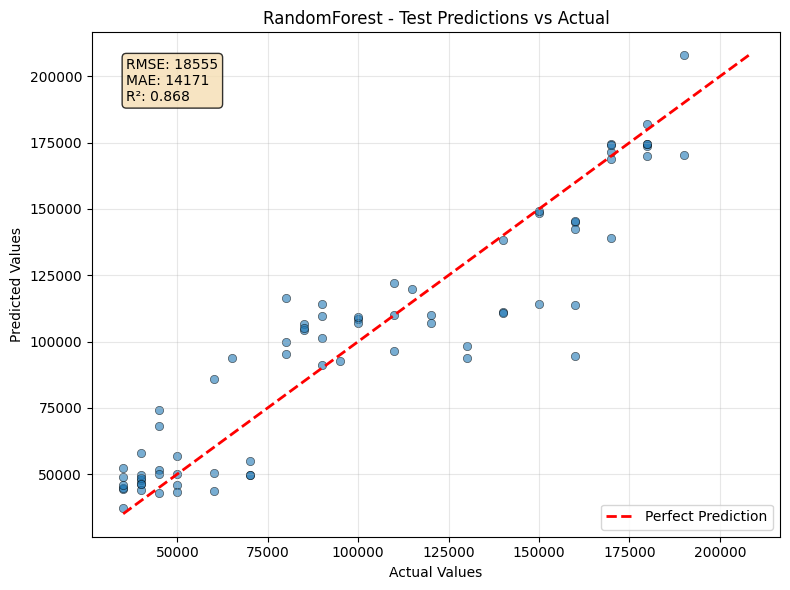

In [466]:
df_na.plot_predictions(X_test, y_test, 'Test')

Random Forest (No Age/Experience) SHAP Test:
Prediction: $101,150.00
Base value: $101,692.81
SHAP values shape: 25
Feature names available: True



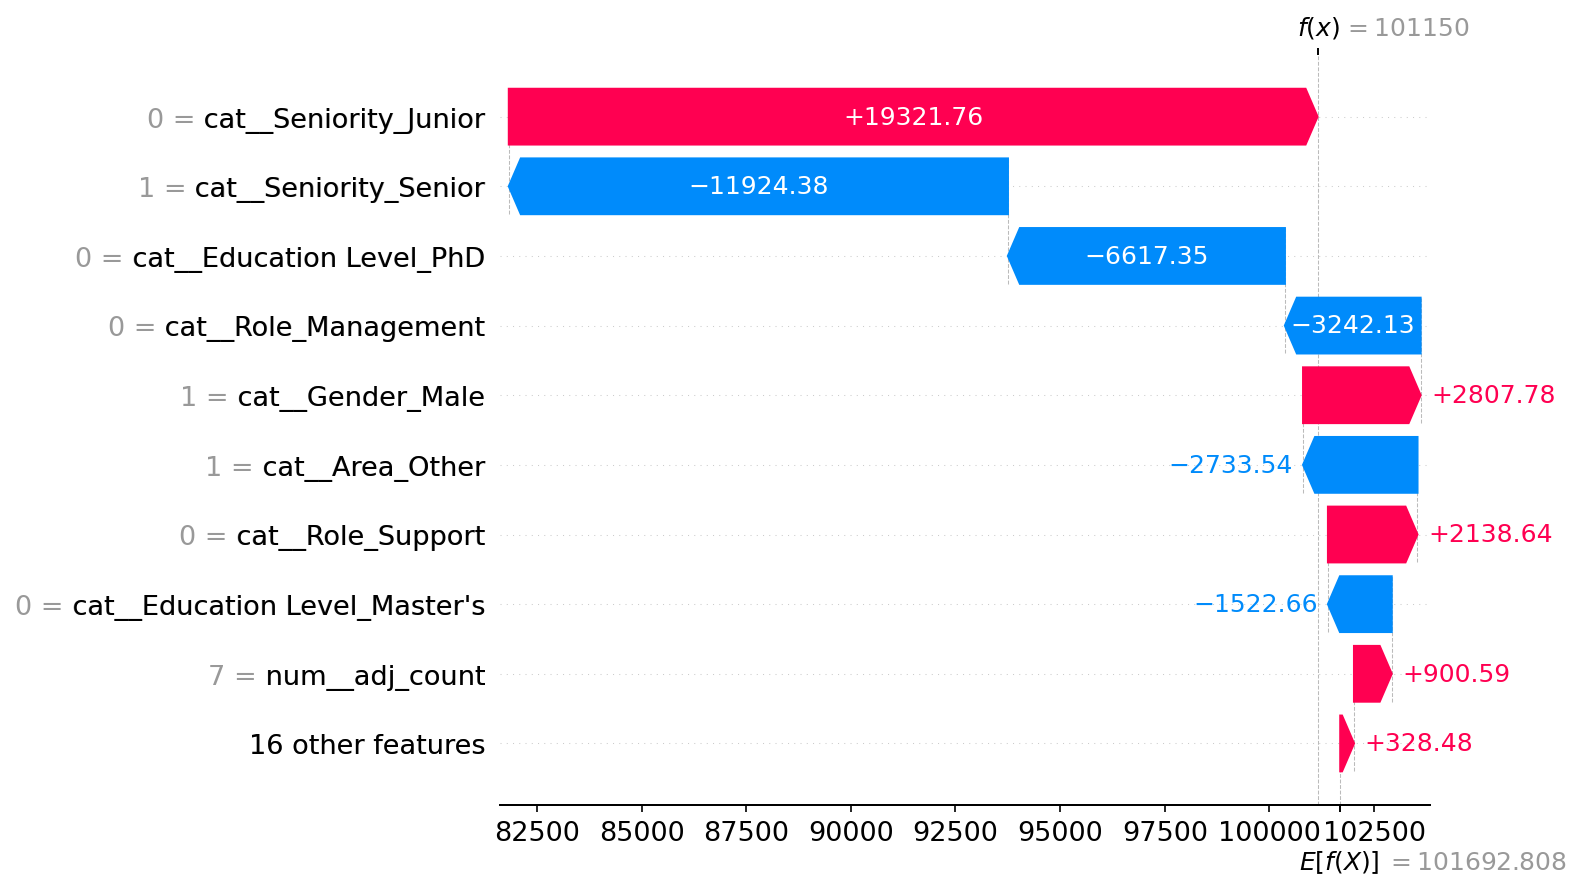

In [467]:
# Test SHAP explanation for Random Forest (no Age/Experience)
test_input_na = X_test.drop(columns=["Age","Years of Experience"], axis=1).iloc[:1]
explanation_na = df_na.explain_prediction(test_input_na)

print("Random Forest (No Age/Experience) SHAP Test:")
print(f"Prediction: ${explanation_na['prediction']:,.2f}")
print(f"Base value: ${explanation_na['base_value']:,.2f}")
print(f"SHAP values shape: {len(explanation_na['shap_values'])}")
print(f"Feature names available: {explanation_na['feature_names'] is not None}")

# Display the plot
HTML(f'<img src="{explanation_na["shap_plot"]}" width="600">')

---

## Random forest bayesian optimization

In [468]:
opt_study = rf.optimize(X_train, y_train, trials = 150)

[I 2025-06-30 12:41:00,989] A new study created in memory with name: no-name-247bbc1d-0cda-4bea-b211-86e5472f482b
[I 2025-06-30 12:41:01,096] Trial 0 finished with value: 17779.049258720763 and parameters: {'n_estimators': 139, 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 17779.049258720763.
[I 2025-06-30 12:41:01,222] Trial 1 finished with value: 19978.544054327453 and parameters: {'n_estimators': 162, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 17779.049258720763.
[I 2025-06-30 12:41:01,398] Trial 2 finished with value: 17996.11077541195 and parameters: {'n_estimators': 258, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 17779.049258720763.
[I 2025-06-30 12:41:01,463] Trial 3 finished with value: 16807.099681286134 and parameters: {'n_estimators': 73, 'max_depth': 6, 'min_s

Best parameters: {'n_estimators': 259, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best score: 13748.32
After preprocessing: 27 features
  - Ordinal encoded: []
  - One-hot encoded: ['Gender', 'Education Level', 'Seniority', 'Area', 'Role']
  - Numerical features: 6


In [469]:
rf.evaluate(X_test, y_test)

Model metrics updated with 3 metrics


,metric,point_estimate,95%_CI
0,RMSE,12941.471164,"(10160.852, 15621.831)"
1,MAE,9226.566005,"(7123.032, 11333.795)"
2,R2,0.935720,"(0.894, 0.962)"


In [470]:
rf.get_model_info()

{'model_type': 'RandomForest',
 'is_fitted': True,
 'model_params': {'max_features': 'sqrt',
  'normalize': True,
  'ordinal_mappings': {},
  'random_state': 37,
  'max_depth': 14,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'n_estimators': 259}}

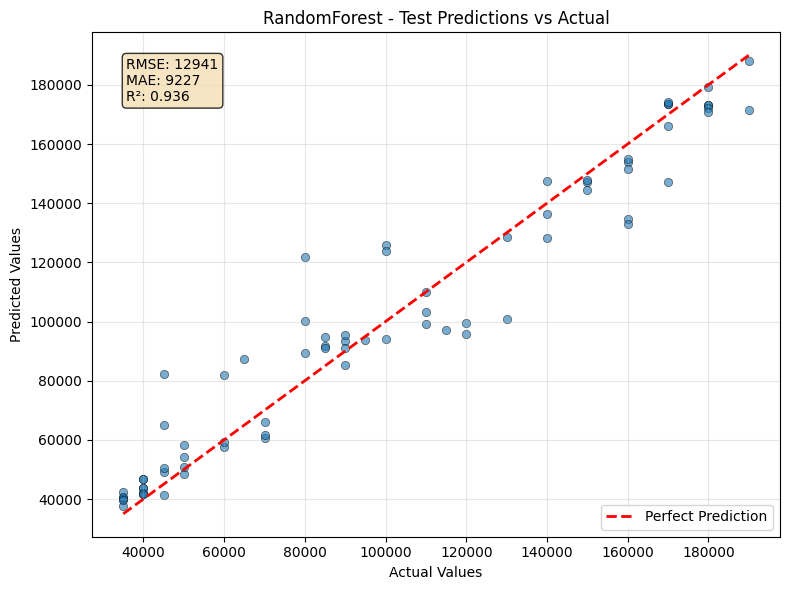

In [471]:
rf.plot_predictions(X_test, y_test, 'Test')

Optimized Random Forest SHAP Test:
Prediction: $93,369.54
Base value: $101,692.81
SHAP values shape: 27
Feature names available: True



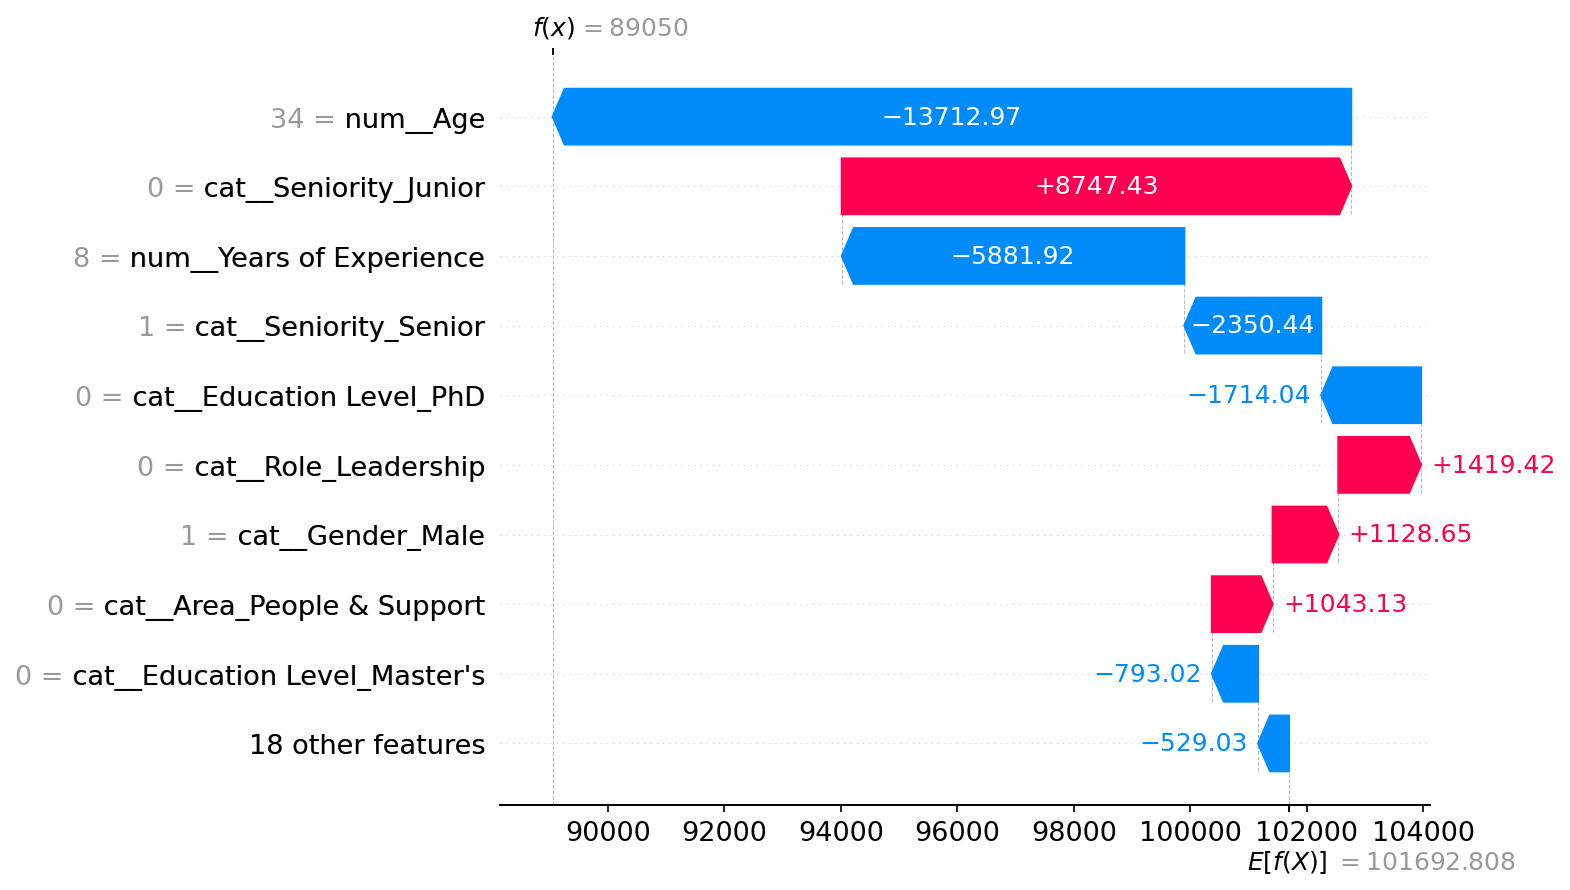

In [472]:
# Test SHAP explanation for Optimized Random Forest
test_input_opt = X_test.iloc[:1]  # Single row for testing
explanation_opt = rf.explain_prediction(test_input_opt)

print("Optimized Random Forest SHAP Test:")
print(f"Prediction: ${explanation_opt['prediction']:,.2f}")
print(f"Base value: ${explanation_opt['base_value']:,.2f}")
print(f"SHAP values shape: {len(explanation_opt['shap_values'])}")
print(f"Feature names available: {explanation_opt['feature_names'] is not None}")

# Display the plot
HTML(f'<img src="{explanation_opt["shap_plot"]}" width="600">')

In [473]:
rf.save("RandomForest_BOopt")

Model saved successfully to /home/frank/maestria_mcd/PwC/pwc_challenge/models/RandomForest_BOopt.pkl


---

In [474]:
# Collect all model metrics and create comparison table
model_metrics = []

# Dummy model
dummy_metrics = dummy.evaluate(X_test, y_test)
model_metrics.append({
    'Model': 'Dummy (Median)',
    'RMSE': f"{dummy_metrics.iloc[0]['point_estimate']:,.0f}",
    'MAE': f"{dummy_metrics.iloc[1]['point_estimate']:,.0f}",
    'R²': f"{dummy_metrics.iloc[2]['point_estimate']:.3f}",
    'RMSE_CI': dummy_metrics.iloc[0]['95%_CI'],
    'MAE_CI': dummy_metrics.iloc[1]['95%_CI'],
    'R²_CI': dummy_metrics.iloc[2]['95%_CI']
})

# OLS
model_metrics.append({
    'Model': 'Linear (OLS)',
    'RMSE': f"{metrics_ols.iloc[0]['point_estimate']:,.0f}",
    'MAE': f"{metrics_ols.iloc[1]['point_estimate']:,.0f}",
    'R²': f"{metrics_ols.iloc[2]['point_estimate']:.3f}",
    'RMSE_CI': metrics_ols.iloc[0]['95%_CI'],
    'MAE_CI': metrics_ols.iloc[1]['95%_CI'],
    'R²_CI': metrics_ols.iloc[2]['95%_CI']
})

# SGD
model_metrics.append({
    'Model': 'Linear (SGD)',
    'RMSE': f"{metrics_sgd.iloc[0]['point_estimate']:,.0f}",
    'MAE': f"{metrics_sgd.iloc[1]['point_estimate']:,.0f}",
    'R²': f"{metrics_sgd.iloc[2]['point_estimate']:.3f}",
    'RMSE_CI': metrics_sgd.iloc[0]['95%_CI'],
    'MAE_CI': metrics_sgd.iloc[1]['95%_CI'],
    'R²_CI': metrics_sgd.iloc[2]['95%_CI']
})

# Lasso
model_metrics.append({
    'Model': 'Lasso Regression',
    'RMSE': f"{metrics_lasso.iloc[0]['point_estimate']:,.0f}",
    'MAE': f"{metrics_lasso.iloc[1]['point_estimate']:,.0f}",
    'R²': f"{metrics_lasso.iloc[2]['point_estimate']:.3f}",
    'RMSE_CI': metrics_lasso.iloc[0]['95%_CI'],
    'MAE_CI': metrics_lasso.iloc[1]['95%_CI'],
    'R²_CI': metrics_lasso.iloc[2]['95%_CI']
})

# Decision Tree
model_metrics.append({
    'Model': 'Decision Tree',
    'RMSE': f"{metrics_dt.iloc[0]['point_estimate']:,.0f}",
    'MAE': f"{metrics_dt.iloc[1]['point_estimate']:,.0f}",
    'R²': f"{metrics_dt.iloc[2]['point_estimate']:.3f}",
    'RMSE_CI': metrics_dt.iloc[0]['95%_CI'],
    'MAE_CI': metrics_dt.iloc[1]['95%_CI'],
    'R²_CI': metrics_dt.iloc[2]['95%_CI']
})

# Random Forest (current optimized)
rf_metrics_current = rf.evaluate(X_test, y_test)
model_metrics.append({
    'Model': 'Random Forest (Optimized)',
    'RMSE': f"{rf_metrics_current.iloc[0]['point_estimate']:,.0f}",
    'MAE': f"{rf_metrics_current.iloc[1]['point_estimate']:,.0f}",
    'R²': f"{rf_metrics_current.iloc[2]['point_estimate']:.3f}",
    'RMSE_CI': rf_metrics_current.iloc[0]['95%_CI'],
    'MAE_CI': rf_metrics_current.iloc[1]['95%_CI'],
    'R²_CI': rf_metrics_current.iloc[2]['95%_CI']
})

# Random Forest (No Age/Exp)
rf_metrics_na = df_na.evaluate(X_test, y_test)
model_metrics.append({
    'Model': 'Random Forest (No Age/Exp)',
    'RMSE': f"{rf_metrics_na.iloc[0]['point_estimate']:,.0f}",
    'MAE': f"{rf_metrics_na.iloc[1]['point_estimate']:,.0f}",
    'R²': f"{rf_metrics_na.iloc[2]['point_estimate']:.3f}",
    'RMSE_CI': rf_metrics_na.iloc[0]['95%_CI'],
    'MAE_CI': rf_metrics_na.iloc[1]['95%_CI'],
    'R²_CI': rf_metrics_na.iloc[2]['95%_CI']
})

# Create comparison DataFrame
comparison_df = pd.DataFrame(model_metrics)

# Sort by R² (descending)
comparison_df['R²_numeric'] = comparison_df['R²'].astype(float)
comparison_df = comparison_df.sort_values('R²_numeric', ascending=False).drop('R²_numeric', axis=1)

print("Model Performance Comparison with 95% Confidence Intervals")
print("=" * 80)
print(comparison_df.to_string(index=False))

Model metrics updated with 3 metrics
Model metrics updated with 3 metrics
Model metrics updated with 3 metrics
Model Performance Comparison with 95% Confidence Intervals
                     Model   RMSE    MAE     R²                RMSE_CI                 MAE_CI            R²_CI
 Random Forest (Optimized) 12,941  9,227  0.936  (9780.574, 16098.963)  (7153.571, 11720.878)   (0.895, 0.965)
             Decision Tree 18,198 12,163  0.873 (13383.899, 22800.227)  (8666.198, 15589.296)   (0.792, 0.939)
Random Forest (No Age/Exp) 18,555 14,171  0.868 (15366.462, 22981.041) (11816.589, 17087.564)   (0.778, 0.916)
          Lasso Regression 20,593 15,888  0.837 (16707.841, 23871.431) (12947.960, 18951.118)   (0.772, 0.888)
              Linear (SGD) 21,005 16,225  0.831 (17266.213, 24349.439) (13384.329, 19814.767)   (0.753, 0.885)
              Linear (OLS) 21,814 16,810  0.817 (18103.883, 24688.340) (13903.429, 20334.026)   (0.736, 0.874)
            Dummy (Median) 51,245 44,527 -0.008 (4607